In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lenskit.algorithms import Recommender, als, item_knn as knn
from lenskit.topn import RecListAnalysis, ndcg, precision
from lenskit.metrics.predict import rmse
from lenskit import crossfold as xf, batch, topn, util
import numpy as np
from lenskit.algorithms.basic import Random
from collections import defaultdict
import pickle

In [3]:
def load_entropy_table():
    with open('entropy_table.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
trainset = pd.read_parquet(f"mard_train-0.parquet")
testset = pd.read_parquet(f"mard_test-0.parquet")

entropy_table = load_entropy_table()

In [9]:
def get_test_recs(aname, algo, train, test):
    '''
    Fit and generate test recommendations for algo object with name aname
    '''
    print(f"Fitting {aname}")
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    print(f"{aname} Fitted")
    users = test.user.unique()
    recs = batch.recommend(algo=fittable, users=users, n=50)
    recs['Algorithm'] = aname
    return recs

def novelty(preds, truth, k, entropy_table):
    

    #convert df into dictionairy to improve performance
    return np.mean([entropy_table[item] for item in preds['item']])


In [10]:
rla = RecListAnalysis()
rla.add_metric(ndcg, name="ndcg_50", k=50)
rla.add_metric(precision, name="precision_50",k=50)
rla.add_metric(novelty, name="novelty_50", k=50, entropy_table=entropy_table)

In [11]:
def get_scores(results, metric_names):
    scores = {}
    for name in metric_names:
        scores[name] = np.mean(results[name])
        
    return scores

In [13]:

metric_names = ["ndcg_50", "precision_50", "novelty_50"]
features = [30, 50, 70, 90, 110, 150, 200, 300]

all_results = []
all_scores = []

for f in features:
    print(f"features={f}")
    algo = als.BiasedMF(features=f)
    print("generating recs...")
    test_recs = get_test_recs('biasedmf', algo, trainset, testset)

    print("evaluating")
    results = rla.compute(test_recs, testset)
    scores = get_scores(results, metric_names)
    
    all_results.append(results)
    all_scores.append(scores)
    
    print(scores)
    
    
    

features=30
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 12:57:25.399159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:57:25.399149: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:57:25.399159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:57:25.399334: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.0018223862241779673, 'precision_50': 0.0001616978271854472, 'novelty_50': 0.0018860005749103599}
features=50
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 12:58:32.843725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:58:32.847198: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:58:32.855025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:58:33.025405: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.0029020436562934124, 'precision_50': 0.00019201616978271855, 'novelty_50': 0.0019384780947329613}
features=70
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 12:59:47.559169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:59:47.559168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:59:47.559168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 12:59:47.781345: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.003418953733341272, 'precision_50': 0.00019201616978271855, 'novelty_50': 0.0019376186574762311}
features=90
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 13:01:41.529278: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:01:41.529277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:01:41.529277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:01:41.529277: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.0038565514934061043, 'precision_50': 0.0002223345123799899, 'novelty_50': 0.00193857924929994}
features=110
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 13:03:32.374142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:03:32.374154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:03:32.374440: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:03:32.374470: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.0031351155006240144, 'precision_50': 0.00017180394138453762, 'novelty_50': 0.001942476926277287}
features=150
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 13:05:32.757836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:05:32.767176: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:05:32.793433: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:05:32.831499: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.0034175191501355042, 'precision_50': 0.00022233451237998992, 'novelty_50': 0.0019271254769341615}
features=200
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 13:07:53.748803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:07:53.748791: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:07:53.748803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:07:53.748805: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.0032781030514743787, 'precision_50': 0.00020212228398180902, 'novelty_50': 0.0019006150788893827}
features=300
generating recs...
Fitting biasedmf
biasedmf Fitted


2023-12-08 13:10:53.816372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:10:53.816497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:10:53.816819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 13:10:53.817093: I tensorflow/core/platform/cpu_featu

evaluating
{'ndcg_50': 0.003125748534549966, 'precision_50': 0.00018191005558362808, 'novelty_50': 0.001881592707271077}


In [16]:
scores_df = pd.DataFrame(all_scores)
scores_df['Number of Factors'] = features
scores_df

,ndcg_50,precision_50,novelty_50,Number of Factors
0,0.001822,0.000162,0.001886,30
1,0.002902,0.000192,0.001938,50
2,0.003419,0.000192,0.001938,70
3,0.003857,0.000222,0.001939,90
4,0.003135,0.000172,0.001942,110
5,0.003418,0.000222,0.001927,150
6,0.003278,0.000202,0.001901,200
7,0.003126,0.000182,0.001882,300


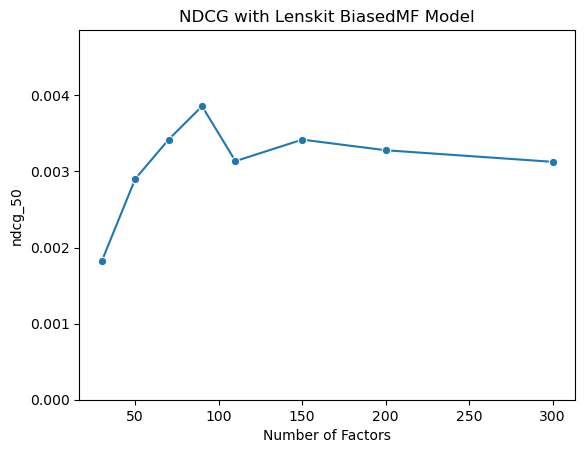

In [36]:
sns.lineplot(x="Number of Factors", y="ndcg_50", marker="o", data=scores_df)
plt.title("NDCG with Lenskit BiasedMF Model")
plt.ylim(0, max(scores_df['ndcg_50']) + 0.001)
plt.savefig('plots/biasedmf_ndcg.png')

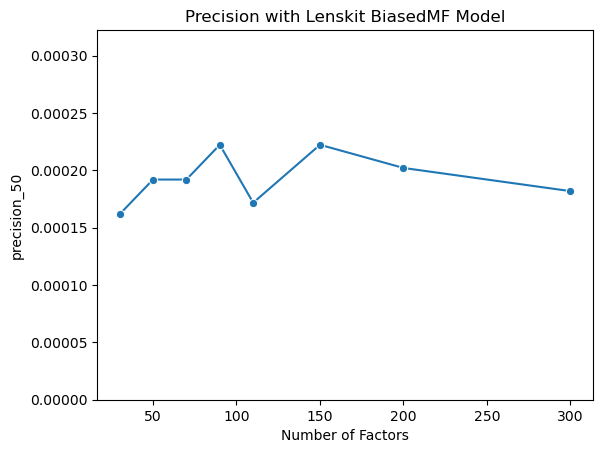

In [37]:
sns.lineplot(x="Number of Factors", y="precision_50", marker="o", data=scores_df)
plt.title("Precision with Lenskit BiasedMF Model")
plt.ylim(0, max(scores_df['precision_50']) + 0.0001)

plt.savefig('plots/biasedmf_precision.png')

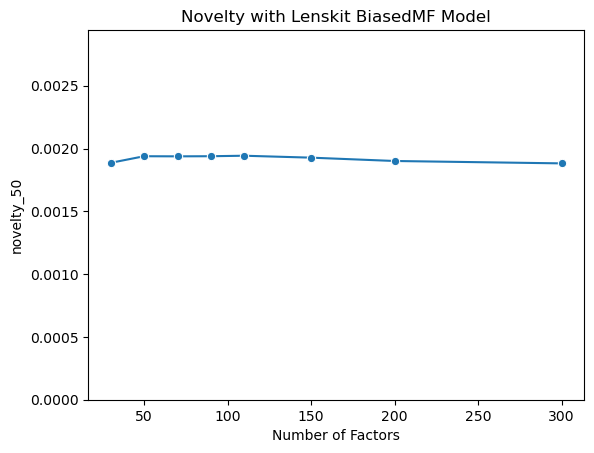

In [38]:
sns.lineplot(x="Number of Factors", y="novelty_50", marker="o", data=scores_df)
plt.title("Novelty with Lenskit BiasedMF Model")
plt.ylim(0, max(scores_df['novelty_50']) + 0.001)
plt.savefig('plots/biasedmf_novelty.png')